In [1]:
import os
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from random import randrange
import math
import pymap3d as pm
from scipy.spatial.transform import Rotation
from pathlib import Path
from utils import project_root

In [2]:
plt.rcParams["figure.figsize"] = (20,10)

In [3]:
os.chdir(Path(project_root() / 'data/imu'))
lines = []
with open('imu_01_03_22.txt') as f:
    lines = f.readlines()

In [4]:
ang_vel = [] # [w_x, w_y, w_z]
ang_vel_e = []
lin_acc = [] # [x_ddot, y_ddot, z_ddot]
sec_imu = []
nsec_imu = []
count = 0

for idx, line in enumerate(lines):
    count += 1
    if line[4:7] == "sec":
        sec_imu.append(int(line[9:-1]))
    elif line[4:11] == "nanosec":
        nsec_imu.append(int(line[13:-1]))
    elif line[0:-1] == "orientation:":
        qx = float(lines[idx+1][5:-1])
        qy = float(lines[idx+2][5:-1])
        qz = float(lines[idx+3][5:-1])
        qw = float(lines[idx+4][5:-1])       
    elif line[0:-1] == "angular_velocity:":
        w_x = float(lines[idx+1][5:-1])
        w_y = float(lines[idx+2][5:-1])
        w_z = float(lines[idx+3][5:-1])
        ang_vel.append([w_x, w_y, w_z])
    elif line[0:-1] == "linear_acceleration:":
        a_x = float(lines[idx+1][5:-1])
        a_y = float(lines[idx+2][5:-1])
        a_z = float(lines[idx+3][5:-1])
        lin_acc.append([a_x, a_y, a_z])

In [9]:
sec_imu[0]

1646128970

In [10]:
# save the angular velocity in degrees/sec as well
ang_vel_e = []
for temp in ang_vel:
    a0 = np.rad2deg(temp[0])
    a1 = np.rad2deg(temp[1])
    a2 = np.rad2deg(temp[2])
    
    ang_vel_e.append([a0, a1, a2])

In [11]:
temp = [i*1e-9 for i in nsec_imu]
t_imu = [sum(x) for x in zip(sec_imu, temp)]
tt_imu = [x-t_imu[0] for x in t_imu]

In [20]:
print(f"Test duration: {(tt_imu[-1] - tt_imu[0])/3600} hours")

Test duration: 2.1387435331609512 hours


In [12]:
t = np.arange(len(ang_vel))

[-0.00281234 -0.00941906  0.00504196]


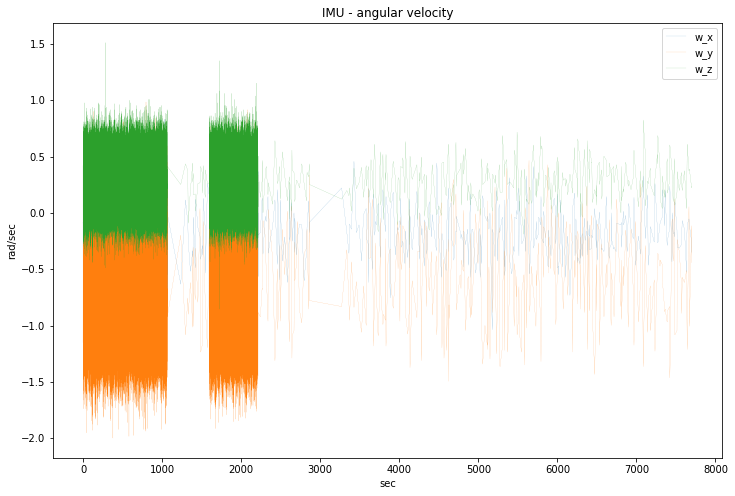

In [30]:
print(np.mean(np.array(ang_vel), axis=0))
ang_vel_imu_bias = np.mean(np.array(ang_vel), axis=0)

fig,ax = plt.subplots(figsize=(12,8))

ax.plot(tt_imu, np.array(ang_vel_e)[:,0], linewidth=0.1, label="w_x")
ax.plot(tt_imu, np.array(ang_vel_e)[:,1], linewidth=0.1, label="w_y")
ax.plot(tt_imu, np.array(ang_vel_e)[:,2], linewidth=0.1, label="w_z")

ax.set_title("IMU - angular velocity")
ax.set_xlabel("sec")
ax.set_ylabel("rad/sec")

plt.legend()
plt.show()

[ 0.21330168 -0.04087418  9.91409073]


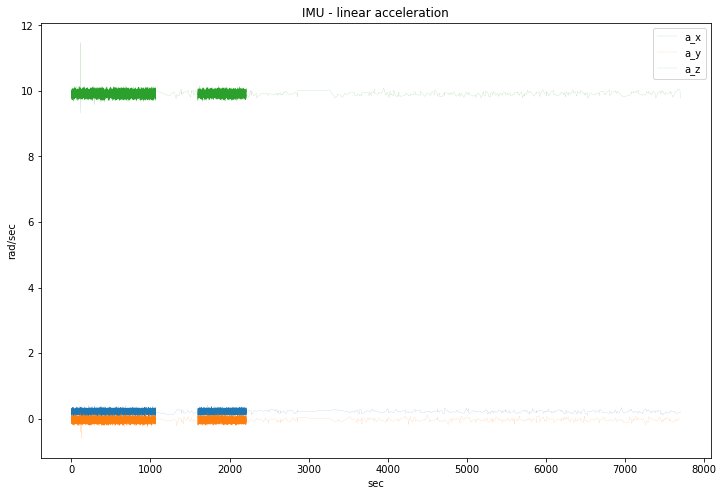

In [29]:
lin_acc_imu_bias = np.mean(np.array(lin_acc), axis=0)
print(lin_acc_imu_bias)

fig,ax = plt.subplots(figsize=(12,8))

ax.plot(tt_imu, np.array(lin_acc)[:,0], linewidth=0.1, label="a_x")
ax.plot(tt_imu, np.array(lin_acc)[:,1], linewidth=0.1, label="a_y")
ax.plot(tt_imu, np.array(lin_acc)[:,2], linewidth=0.1, label="a_z")

ax.set_title("IMU - linear acceleration")
ax.set_xlabel("sec")
ax.set_ylabel("rad/sec")
plt.legend()
plt.show()